# Librería

In [135]:
from numpy import matrix
import numpy as np
import sympy as sp
from scipy import linalg as al
import string
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [136]:
import warnings
warnings.filterwarnings("ignore")

# Laboratorio 07 Matrices

## Soleil Dayana Niño Murcia 1033097666

#### Métodos computacionales para físicos  y astrónomos
#### Universidad de Antioquia
#### Prof: Hernan D. Salinas Jiménez & Juan Marcos Marín Ramírez

## Punto 1: **Modelo de encriptación**


Un proceso para encriptar un mensaje secreto es usar cierta matriz cuadrada cuyos elementos son enteros con elementos enteros en la inversa. Se recibe un mensaje, se asigna un número a cada letra Por ejemplo, A=1, B=2, C=3, ... etc. y espacio=27, se arreglan los números en una matriz de izquierda a derecha en cada fila, donde el número de elementos en la fila es igual al tamaño de la matriz de código, se multiplica esa matriz por la matriz de código por la derecha, se transcribe el mensaje en una cadena de números y se manda el mensaje.

La persona que debe recibir el mensaje conoce la matriz de código. El o ella arreglan el mensaje encriptado en una matriz de izquierda a derecha en cada fila, en donde el número de elementos en una fila conicide con el tamaño de la matriz de código multiplicada por la derecha, por el inverso de la matriz de código y puede leer mensaje decodificado.

Usted ha recibido el siguiente mensaje que fue encriptado usando la matriz A. Decodifiquelo.

```
matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
```

Mensaje

```
47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588,
```


la primera fila del mensaje es `47,49,-19,257,487`

*¿Cual es el mensaje?*

In [137]:
MatrizCodigo = np.matrix([ # Guardo la matriz del mensaje como matriz de numpy
        [ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
MatrizCodigo

MyMessage = [47, 49, -19, 257, 487, 10, -9, 63, 137, 236, 79, 142, -184, 372, 536, 59, 70, -40, 332, 588]
MatrizMessage = np.reshape(MyMessage, (len(MyMessage)//5, 5))

# print(MatrizCodigo[3,4]) Ejemplo para tomar cualquier entrada de la matriz

# Crear una lista del abecedario
ABC = list(string.ascii_uppercase) # ascii_letters en Python es una cadena predefinida que contiene todas las letras ASCII en mayúsculas y minúsculas.
numeric_biblio = {}
for i in range(len(ABC)): # Asigna un número a cada letra
    i = i + 1
    numeric_biblio[i] = ABC[i-1]

space = ' '
numeric_biblio[27] = space # define la tecla espacio

print(numeric_biblio)

{1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J', 11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O', 16: 'P', 17: 'Q', 18: 'R', 19: 'S', 20: 'T', 21: 'U', 22: 'V', 23: 'W', 24: 'X', 25: 'Y', 26: 'Z', 27: ' '}


In [138]:
MatrizMessage

array([[  47,   49,  -19,  257,  487],
       [  10,   -9,   63,  137,  236],
       [  79,  142, -184,  372,  536],
       [  59,   70,  -40,  332,  588]])

In [139]:
biblio_array = np.array(list(numeric_biblio.values()))
print(biblio_array)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' ' ']


In [140]:
InverseMessage = al.inv(MatrizCodigo)
print(InverseMessage)

[[ 14.   1.  -2.   1.  -5.]
 [ 22.  -7.  -4.   6. -19.]
 [ 13.  -3.  -2.   3. -10.]
 [ -2.   1.   1.  -1.   2.]
 [ -2.   0.   0.   0.   1.]]


In [141]:
matriz_desencriptada = MatrizMessage @ InverseMessage
print(matriz_desencriptada)

[[ 1. 18.  5. 27. 25.]
 [15. 21. 27.  8.  1.]
 [22.  9. 14.  7. 27.]
 [ 6. 21. 14. 27. 27.]]


In [142]:
mensaje_desencriptado = ""
for fila in matriz_desencriptada:
    for num in fila:
      letra = numeric_biblio[int(round(num))]
      mensaje_desencriptado += letra

print('El mensaje es:', mensaje_desencriptado)

El mensaje es: ARE YOU HAVING FUN  


¡Claro que me divierto con Python! :D

## Punto 2: **Operaciones matricial con regresión lineal.**

Cuando se desea hacer una regresión lineal multivariada, existen diferentes formas de realizar la regresión, una de ellas es encontrar el error cuadrático medio y minimizar el conjunto de parámetros de la regresión emplando algún método de minimización; otra forma es encontrar la expresión analítica en forma matricial, para determinar el conjunto de parámetros de la regresión. En este último caso, la regresión lineal viene dada por la siguiente expresion generalizada:


$$\theta_ = (X^T X)^{-1} X^T y$$

donte $\theta_$ es la matriz de parametros asociados a la regresión lineal, $X$ la matriz de características y $y$ los valos esperados, así, si tenemos una conjunto de datos en $N$ dimensiones; la recta, plano o hiperplano puede ser calculado como:

$$Y=\Theta^T X$$


En el caso de dos dimensiones, supongamos que $X$, e $Y$ presentan un comportamiento lineal, y vienen dados por (en este caso el super indice es):


- Sea $\vec{X}=x^{(1)}, x^{(2)}, x^{(3)}, x^{(4)}, ..., x^{(m)}$
- Sea $\vec{Y}=y^{(1)}, y^{(2)}, y^{(3)}, y^{(4)}, ..., y^{(m)}$

Para determinar la ecuación de la recta, hay que conocer los párametros $\theta_0 $, $\theta_1$, que cumplen que :   $y^{(i)} = \theta_1 x^{(i)} + \theta_0$ la anterior expresión puede ser escrita como:

\begin{equation}
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(m)}\\
\end{bmatrix}=
\begin{bmatrix}
\theta_0 & \theta_1 \\
\end{bmatrix}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(m)} \\
\end{bmatrix}
\end{equation}


Para determinar la matriz de theta entonces se puede aplicar la ecuación:

$$\Theta = (X^T X)^{-1} X^T y$$

donde:
\begin{equation}
X=
\begin{bmatrix}
1 & x_1^{(1)} \\
1 & x_1^{(2)} \\
\vdots & \vdots \\
1 & x_1^{(m)}
\end{bmatrix}
\end{equation}

y


\begin{equation}
y=
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots\\
y^{(m)}
\end{bmatrix}
\end{equation}

Su tarea será construir un programa que realice la regresión lineal para los siguientes puntos:
```python
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise
```



Generalice para el siguiente problema bidimensional:


```python
N = 10
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2) + 0.0 #+ 4*np.random.random(100)

N = 10
X1, X2 = np.meshgrid(x1,x2)
Y = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y)
#scatter = ax.scatter(x1, x2, y,"-")
```

### Caso unidimensional:

>


Text(0.5, 1.0, 'Regresión Lineal Unidimensional')

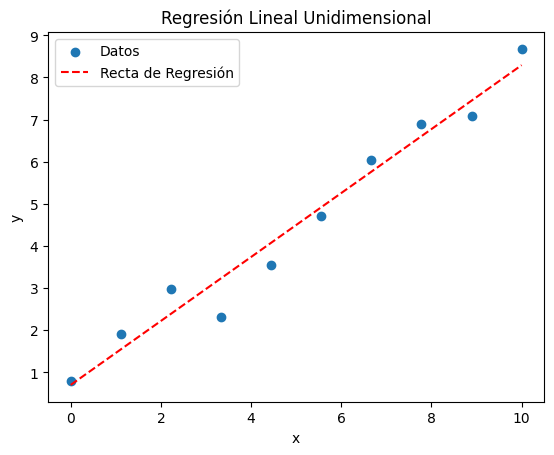

In [143]:
N = 10
x1 = np.linspace(0, 10, N)
noise = 2 * np.random.random(N) - 1
y = 0.9 * x1 + noise

def regresion_lineal(x, y):
  # Prefiero usar pseudo_inversa (pinv) porque obtenía una matriz singular
  return np.linalg.pinv(np.transpose(x) @ x) @ np.transpose(x) @ y
X = np.transpose(np.vstack((np.ones(N), x1))) # Construcción de la matriz X (agregando la columna de unos para θ0)

theta = regresion_lineal(X, y) # Aplicando la ecuación de regresión lineal

y_p = X @ theta # Valores ajustados de la regresión

# Graficamos los puntos y la recta de regresión
plt.scatter(x1, y, label="Datos")
plt.plot(x1, y_p, 'r--', label="Recta de Regresión")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresión Lineal Unidimensional")

### Caso bidimensional:

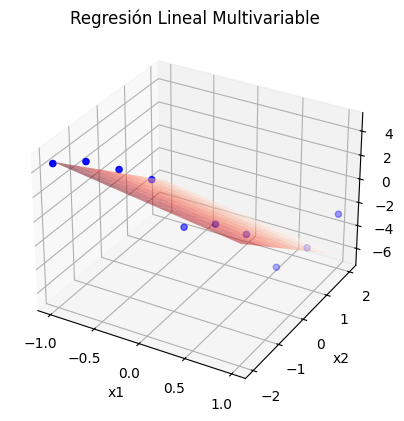

In [144]:
N = 10
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1 = 2 * np.random.random(N) - 1
noise2 = 2 * np.random.random(N) - 1
y = 2 * (x1 + noise1) - 3 * (x2 + noise2)

# Construcción de la matriz X
X = np.transpose(np.vstack((np.ones(N), x1, x2)))

# Aplicando la ecuación de regresión lineal
theta = regresion_lineal(X,y)

# Valores ajustados de la regresión
y_pred = X @ theta

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # Gráfico 3D
ax.scatter(x1, x2, y, color='blue', label="Datos reales")

# Superficie de regresión
X1, X2 = np.meshgrid(x1,x2)
Y = theta[0] + theta[1] * X1 + theta[2] * X2
surf = ax.plot_surface(X1, X2, Y, cmap='Reds', alpha=0.5)

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
ax.set_title("Regresión Lineal Multivariable")
plt.show()

In [145]:
print(f"Thetas obtenidos: θ0 = {theta[0]:.4f}, θ1 = {theta[1]:.4f}, θ2 = {theta[2]:.4f}")

Thetas obtenidos: θ0 = -0.7942, θ1 = -1.0961, θ2 = -2.1923


## Punto 3: **Diagonalización**.

Se sabe que un sistema físico es gobernado por las ecuaciones,



$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-1z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

a) Diagonalize $A$.



In [146]:
A_p3 = np.array([[2, -1, 1],
                [0, 3, -1],
                [2, 1, 3]])

# Calcular los valores y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(A_p3)

D = np.diag(eigenvalues)

print('Matriz diagonalizada:\n\n', D)

Matriz diagonalizada:

 [[4.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j]
 [0.+0.00000000e+00j 2.+1.68652966e-08j 0.+0.00000000e+00j]
 [0.+0.00000000e+00j 0.+0.00000000e+00j 2.-1.68652966e-08j]]


b) Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.



In [147]:
t1, t2 = 0, 2
U = eigenvectors
U_inv = np.linalg.inv(U)

In [148]:
def f_A(A, t):
    return np.exp(A * t)

t = 2  # Tiempo para prueba

f_D_t = f_A(D, t) # f(D)

f_A_t = U @ f_D_t @ U_inv # f(A) en tiempo t

print(f"Ejemplo de prueba f(A) en t={t}:\n\n{f_A_t}")

time_points = np.linspace(t1, t2, 100) # Vector de tiempo

x_values, y_values, z_values = [], [], []
r0 = np.array([1, 1, 2]) # Condiciones iniciales de r(0)

for t in time_points: # Encontrar ahora para t = [0,2]
    f_D_t = f_A(D, t)
    f_A_t = U @ f_D_t @ U_inv
    r_t = f_A_t @ r0

    x_values.append(r_t[0])
    y_values.append(r_t[1])
    z_values.append(r_t[2])

Ejemplo de prueba f(A) en t=2:

[[ 1407.58176847+7.93821211e-08j  -112.19630007+7.93821211e-08j
   1463.1799185 +1.32509177e-22j]
 [-1353.98361844+3.84723365e-07j   165.7944501 +3.84723365e-07j
  -1463.1799185 -3.38886526e-22j]
 [ 1572.37621857-9.50798558e-08j   110.19630007-9.50798558e-08j
   1516.77806854-2.40438882e-23j]]


c) Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.



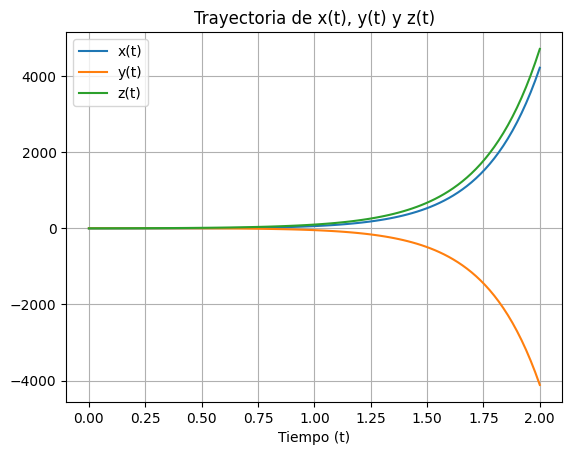

In [149]:

plt.plot(time_points, x_values, label="x(t)")
plt.plot(time_points, y_values, label="y(t)")
plt.plot(time_points, z_values, label="z(t)")
plt.xlabel("Tiempo (t)")
plt.title("Trayectoria de x(t), y(t) y z(t)")
plt.legend()
plt.grid(True)

d) Compare el resultado a la solución analítica,

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$

In [150]:
t, x0, y0, z0 = sp.symbols('t x0 y0 z0')

x_analitica = (x0 * sp.exp(2 * t) * (1 + sp.exp(2 * t) - 2 * t) +
                y0 * (-2 * t * sp.exp(2 * t)) +
                z0 * (sp.exp(2 * t) * (-1 + sp.exp(2 * t)))) / 2

y_analitica = (x0 * (-sp.exp(2 * t) * (-1 + sp.exp(2 * t) - 2 * t)) +
                y0 * (2 * (t + 1) * sp.exp(2 * t)) +
                z0 * (-sp.exp(2 * t) * (-1 + sp.exp(2 * t)))) / 2

z_analitica= (x0 * (sp.exp(2 * t) * (-1 + sp.exp(2 * t) + 2 * t)) +
                y0 * (2 * t * sp.exp(2 * t)) +
                z0 * (sp.exp(2 * t) * (1 + sp.exp(2 * t)))) / 2

x_analitica_sust = x_analitica.subs({x0: 1, y0: 1, z0: 2}) # Sustituir con las condiciones r(0) = (1, 1, 2)
y_analitica_sust = y_analitica.subs({x0: 1, y0: 1, z0: 2})
z_analitica_sust = z_analitica.subs({x0: 1, y0: 1, z0: 2})

# Conventirlas en funciones
x_analitica_func = sp.lambdify(t, x_analitica_sust, 'numpy')
y_analitica_func = sp.lambdify(t, y_analitica_sust, 'numpy')
z_analitica_func = sp.lambdify(t, z_analitica_sust, 'numpy')

# Calcular soluciones analiticas en los puntos del tiempo
x_analitica_values = x_analitica_func(time_points)
y_analitica_values = y_analitica_func(time_points)
z_analitica_values = z_analitica_func(time_points)

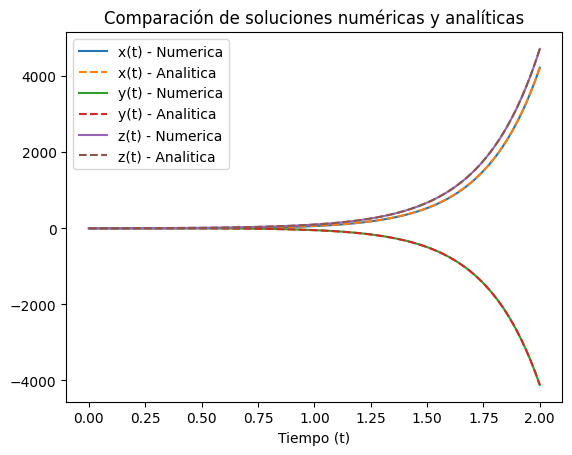

In [151]:
plt.plot(time_points, x_values, label="x(t) - Numerica")
plt.plot(time_points, x_analitica_values, label="x(t) - Analitica", linestyle="--")

plt.plot(time_points, y_values, label="y(t) - Numerica")
plt.plot(time_points, y_analitica_values, label="y(t) - Analitica", linestyle="--")

plt.plot(time_points, z_values, label="z(t) - Numerica")
plt.plot(time_points, z_analitica_values, label="z(t) - Analitica", linestyle="--")

plt.xlabel("Tiempo (t)")
plt.title("Comparación de soluciones numéricas y analíticas")
plt.legend()

## Punto 4: **Modelo de población de una especie de pajaros**
Se estudiará un modelo de crecimiento de la poblacion para una especie de pájaros. En esta población se supone que el número de pajaros hembras es igual al número de machos.  Sea :
- $p_{j,n-1}$ la poblacion juvenil (inmadura) de hembras en el año (n-1)
- $p_{a,n-1}$ el numero de hembras adultas en el mismo año.

Algunos de los pájaros jóvenes morirán  durante el año. Se suponen que cierta proporción de pájaros $\alpha$ de los pájaros jovenes sobrevivirán para llegar a adultos en la primavera del año $n$. Cada hembra que sobrevive prdocuce huevos en la primavera, los incupan y producen, en promedio, $k$ pájaros hembras jóvenes en al siguiente primavera. Los adultos también mueren y la proporcion de adultos que sobrevive de una primavera a la siguiente es $\beta$.

Un modelo para el crecimiento poblacional de pajaros
\begin{equation}
p_{j,n} = kp_{a, n-1}
\end{equation}


\begin{equation}
p_{a,n} =\alpha p_{j,n-1} + \beta p_{a, n-1}
\end{equation}

Que puede ser escrita como ${\bf p_n}=A{\bf p_{n-1}}$, Siendo A la matrix definida en las ecuaciones anteriores, y ${\bf p_n}$ un vector. Para la evolución temporal se cumple que:

- ${\bf p_1}=A{\bf p_{0}}$, ${\bf p_2}=A{\bf p_{1}}= A(A{\bf p_0})=A^2{\bf p_{0}}$ $...$ y asi sucesivamente. Entonces:

\begin{equation}
{\bf p_n} = A^n {\bf p_{0}}
\end{equation}


Supongamos que tenemos 10 hembras  (y 10 machos) adultos y no hay jovenes, la supongmaos que la matriz A viene dada por:

\begin{bmatrix}
0 & 2 \\
0.3 & 0.5
\end{bmatrix}

para la primera poblacion $p_{j,1}=20$, $p_{a,1}=5$, el total de hembras es 25 y la razón jovenes adultas es de 4 a 1. Muestre que la razon $p_{j,n}/p_{a,n}$ converge $1.88$,(como no se puede tener un número racional de pájaros,. aproxime siempre el resultados al menor entero).

- Para la  solución general del modelo del problema de valores y vetores propios
se tiene que:
\begin{equation}
p_n=\lambda_1^n\left [ a_1 \vec{v}_1 +\left( \frac{\lambda_2}{\lambda_1} \right)^n \right]a_2 \vec{v}_2
\end{equation}

Asumiendo que $\lambda_2/ \lambda_1 < 1$, entonces $(\lambda_2/ \lambda_1)^n << 1$ cuando n crece.  Entonce spara n grande se cumple que:

donde $p_n=a_1\lambda_1^n\vec{v}_1$


donde:

${\bf p_0} = a_1 \vec{v}_1 + a_2 \vec{v}_2$, con $v_1$ y $v_2$ vectores propios de A

In [152]:
A = np.array([[0, 2],[0.3, 0.5]], dtype = float)

# Calcular los valores propios y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(A)

In [153]:
# Ordenar los valores propios (y vectores) para identificar el dominante
idx = np.argmax(eigenvalues.real)  # buscamos el de mayor parte real
lambda1 = eigenvalues[idx].real
v1 = eigenvectors[:, idx].real

# Normalizamos v1 de forma que el primer componente sea 1
v1 = v1 / v1[0]

# Calcular la razón asintótica: p_j / p_a = v1[0] / v1[1]
razon = v1[0] / v1[1]

In [154]:
print("Razón asintótica (Valor para el que la razón Pj/Pa converge):", razon.round(3))
print("Razón aproximada (redondeada al menor entero):", int(razon))

Razón asintótica (Valor para el que la razón Pj/Pa converge): 1.88
Razón aproximada (redondeada al menor entero): 1


#Punto 5: Sistemas de ecuaciones
Considere el circuito de la figura. Usando las leyes de Kirchoff escriba las ecuaciones para corriente y voltaje. Luego, determine la forma matricial y encuentre los valores de la corriente que circula por cada nodo, es decir, $i_{12}$, $i_{23}$ y asi sucesivamente.

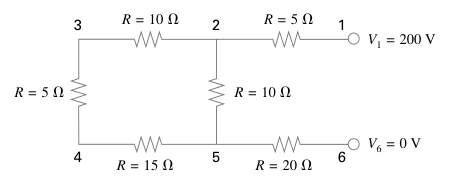

In [155]:
R5, R10, R15, R20, V1, V6 = 5, 10, 15, 20, 200, 0

# Mallas en la matriz de coeficientes
A = np.array([
    [R5 + R10,   -R10,        0      ],
    [-R10,       R10 + R15,   -R15    ],
    [0,          -R15,        R15 + R20]
], dtype=float)

# Vector de términos independientes
b = np.array([V1, 0, -V6], dtype=float)

# Resolver el sistema de ecuaciones para obtener las corrientes de malla
I = np.linalg.solve(A, b)
I1, I2, I3 = I

# Corrientes en cada rama
i_12 = I1            # Rama independiente de malla 1 (R5)
i_23 = I1 - I2       # Rama compartida entre malla 1 y 2 (R10)
i_34 = I2 - I3       # Rama compartida entre malla 2 y 3 (R15)
i_46 = I3            # Rama independitente de malla 3 (R20)

# Mostrar los resultados
print("Corrientes de malla:")
print(f"I1 = {I1:.2f} A")
print(f"I2 = {I2:.2f} A")
print(f"I3 = {I3:.2f} A\n")

print("Corrientes en cada rama:")
print(f"i_12 (nodo 1 - 2, R5):  {i_12:.2f} A")
print(f"i_23 (nodo 2 - 3, R10): {i_23:.2f} A")
print(f"i_45 (nodo 4 - 5, R15): {i_34:.2f} A")
print(f"i_56 (nodo 5 - 6, R20): {i_46:.2f} A")

Corrientes de malla:
I1 = 20.80 A
I2 = 11.20 A
I3 = 4.80 A

Corrientes en cada rama:
i_12 (nodo 1 - 2, R5):  20.80 A
i_23 (nodo 2 - 3, R10): 9.60 A
i_45 (nodo 4 - 5, R15): 6.40 A
i_56 (nodo 5 - 6, R20): 4.80 A
